In [2]:
import pandas as pd
import numpy as np
import networkx as nx

import utils
import pickle
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 11)}, font_scale=2)

import semantic_type_propagation as stp

# Synthetic Benchmark

In [2]:
df_path = 'output/synthetic_example_bipartite/graph_stats_with_groundtruth_df.pickle'
g_path = '../graph_construction/combined_graphs_output/synthetic_benchmark_bipartite/bipartite/bipartite.graph'

G = pickle.load(open(g_path, "rb"))
df = pd.read_pickle(df_path)

# Remove nodes with degree 1 from the dataframe
df = stp.process_df(df, G)

# Compute the groundtruth for the number of meanings for each homograph
df = utils.num_meanings.get_num_meanings_groundtruth(df, G)
df[df['is_homograph'] == True].sort_values(by='betweenness_centrality', ascending=False)

There are 1230 cell nodes with a degree greater than 1
There are 100 unique ranks based on BC.


,node,node_type,betweenness_centrality,is_homograph,pagerank,dense_rank,num_meanings_groundtruth
2384,Jaguar,cell,5.434442e-02,True,0.000064,1.0,2.0
10229,Mace,cell,3.280319e-02,True,0.000052,2.0,2.0
300,Lincoln,cell,3.212017e-02,True,0.000052,3.0,2.0
4228,Heather,cell,2.965270e-02,True,0.000052,4.0,2.0
6646,Charity,cell,2.611485e-02,True,0.000052,5.0,2.0
5701,Leandra,cell,2.611485e-02,True,0.000052,5.0,2.0
15222,Ram,cell,2.539456e-02,True,0.000052,6.0,2.0
981,Phoenix,cell,2.194003e-02,True,0.000052,7.0,2.0
10357,Elan,cell,1.666137e-02,True,0.000052,8.0,2.0
10915,Jimmy,cell,1.630799e-02,True,0.000052,9.0,2.0


In [3]:
homograph_nodes = df[df['is_homograph'] == True]['node'].tolist()
homograph_nodes = json.dumps(homograph_nodes)
homograph_nodes

'["Jaguar", "Mace", "Lincoln", "Heather", "Charity", "Leandra", "Ram", "Phoenix", "Elan", "Jimmy", "Crossfire", "Smitty", "Nadine", "Virginia", "Sydney", "Quinta", "Elmira", "Jamaica", "Pumpkin", "Cuba", "GT", "Garvey", "Conroy", "Reid", "Duff", "Costanza", "Berkeley", "Christophe", "Else", "Vinson", "ES", "TL", "California", "Colorado", "Georgia", "CT", "SC", "Florida", "AL", "ID", "AR", "CO", "MA", "CA", "DE", "TN", "AZ", "MN", "PA", "MD", "SD", "GA", "ME", "IL", "NE"]'

## Incomplete Coverage

In [4]:
with open('output/synthetic_example_bipartite/num_of_meanings_incomplete_coverage/output.json') as json_file:
    out_dict_incomplete = json.load(json_file)

df_incomplete = utils.num_meanings.get_num_meanings_predicted(df.copy(), out_dict_incomplete)
df_incomplete[df_incomplete['node'].isin(out_dict_incomplete['marked_homographs'].keys())]

,node,node_type,betweenness_centrality,is_homograph,pagerank,dense_rank,num_meanings_groundtruth,num_meanings,is_num_meanings_correct
2384,Jaguar,cell,5.434442e-02,True,0.000064,1.0,2.0,2.0,True
10229,Mace,cell,3.280319e-02,True,0.000052,2.0,2.0,2.0,True
300,Lincoln,cell,3.212017e-02,True,0.000052,3.0,2.0,2.0,True
4228,Heather,cell,2.965270e-02,True,0.000052,4.0,2.0,2.0,True
6646,Charity,cell,2.611485e-02,True,0.000052,5.0,2.0,2.0,True
5701,Leandra,cell,2.611485e-02,True,0.000052,5.0,2.0,2.0,True
15222,Ram,cell,2.539456e-02,True,0.000052,6.0,2.0,2.0,True
981,Phoenix,cell,2.194003e-02,True,0.000052,7.0,2.0,2.0,True
10357,Elan,cell,1.666137e-02,True,0.000052,8.0,2.0,2.0,True
10915,Jimmy,cell,1.630799e-02,True,0.000052,9.0,2.0,2.0,True


## Complete Coverage

In [5]:
with open('output/synthetic_example_bipartite/num_of_meanings_full_coverage/output.json') as json_file:
    out_dict_complete = json.load(json_file)

df_complete = utils.num_meanings.get_num_meanings_predicted(df.copy(), out_dict_complete)
df_complete[df_incomplete['node'].isin(out_dict_complete['marked_homographs'].keys())]

,node,node_type,betweenness_centrality,is_homograph,pagerank,dense_rank,num_meanings_groundtruth,num_meanings,is_num_meanings_correct
2384,Jaguar,cell,5.434442e-02,True,0.000064,1.0,2.0,2.0,True
10229,Mace,cell,3.280319e-02,True,0.000052,2.0,2.0,2.0,True
300,Lincoln,cell,3.212017e-02,True,0.000052,3.0,2.0,2.0,True
4228,Heather,cell,2.965270e-02,True,0.000052,4.0,2.0,2.0,True
6646,Charity,cell,2.611485e-02,True,0.000052,5.0,2.0,2.0,True
5701,Leandra,cell,2.611485e-02,True,0.000052,5.0,2.0,2.0,True
15222,Ram,cell,2.539456e-02,True,0.000052,6.0,2.0,2.0,True
981,Phoenix,cell,2.194003e-02,True,0.000052,7.0,2.0,2.0,True
10357,Elan,cell,1.666137e-02,True,0.000052,8.0,2.0,2.0,True
10915,Jimmy,cell,1.630799e-02,True,0.000052,9.0,2.0,2.0,True


# Synthetic Benchmark Large

In [3]:
df_path = 'output/synthetic_example_large/'
g_path = '../graph_construction/combined_graphs_output/synthetic_benchmark_large/bipartite/bipartite.graph'

df = pd.read_pickle(df_path + 'graph_stats_df.pickle')
G = pickle.load(open(g_path, "rb"))

# Add the is_homograph column
df['is_homograph'] = np.nan
is_homograph_map = {}
for node in df[df['node_type']=='cell']['node']:
    is_homograph_map[node] = utils.groundtruth.is_cur_node_homograph(G, node)
df['is_homograph'] = df['node'].map(is_homograph_map)

df.to_pickle(df_path+'graph_stats_with_groundtruth_df.pickle')

# Remove nodes with degree 1 from the dataframe
df = stp.process_df(df, G)

# Compute the groundtruth for the number of meanings for each homograph
df = utils.num_meanings.get_num_meanings_groundtruth(df, G)
df[df['is_homograph'] == True].sort_values(by='betweenness_centrality', ascending=False)

There are 6502 cell nodes with a degree greater than 1
There are 611 unique ranks based on BC.


,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth
7590,Palm,cell,1.445700e-02,True,1.0,2.0
25825,Clementine,cell,8.975958e-03,True,2.0,2.0
7130,Magnolia,cell,8.132084e-03,True,3.0,2.0
3077,Jaguar,cell,8.049376e-03,True,4.0,2.0
7416,Timothy,cell,6.921700e-03,True,5.0,2.0
...,...,...,...,...,...,...
2000,MD,cell,2.103537e-07,True,275.0,2.0
1828,SD,cell,2.059766e-07,True,276.0,2.0
2004,ME,cell,1.214843e-07,True,314.0,2.0
1950,NC,cell,7.969017e-08,True,329.0,2.0


In [4]:
print('There are', len(df[df['is_homograph']==True]), 'homographs based on the groundtruth')
json.dumps(df[df['is_homograph']==True]['node'].tolist())

There are 180 homographs based on the groundtruth


'["Palm", "Clementine", "Magnolia", "Jaguar", "Timothy", "Cougar", "Lettuce", "Lincoln", "Pumpkin", "Charity", "Viva", "Morgan", "Western", "Impala", "Montana", "Jicama", "Mariner", "Guava", "Suzy", "Aurora", "Jimmy", "Somerset", "Wade", "Darcy", "Cuba", "Virginia", "Elmira", "Chicago", "Children", "Ransom", "Magnum", "Brooklyn", "Gantz", "Jamaica", "Bar", "Denton", "Corbin", "Starbuck", "Hugo", "House", "Yucca", "Michael", "Terri", "Crossfire", "Inger", "Golden", "Middleton", "Constantine", "Luther", "Kiwi", "Kohlrabi", "Aura", "Barrie", "Harland", "Tracy", "Pathfinder", "Focus", "MG", "Rio", "M", "Ford", "Noah", "Tacoma", "Tucson", "Madison", "Danbury", "Dayton", "Jackson", "Equinox", "Mirage", "Katy", "Raleigh", "Kimberley", "Montgomery", "Orlando", "Tyler", "ES", "Rogue", "Marguerite", "Calley", "Glen", "Townsend", "Fredi", "Laurence", "Shane", "Cinderella", "Janos", "Ginger", "Brew", "Daniele", "Gus", "Anastasia", "Rosie", "Valerie", "Franklyn", "Spring", "TL", "Thorpe", "Seminole

In [5]:
df[df['num_meanings_groundtruth'] > 2]

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth
300,Lincoln,cell,0.004879,True,8.0,3.0
2012,Montana,cell,0.002381,True,15.0,3.0
1401,Aurora,cell,0.001690,True,20.0,3.0
546,Virginia,cell,0.001467,True,25.0,3.0


## Incomplete Coverage

In [6]:
with open('output/synthetic_example_large/num_of_meanings_incomplete_coverage/output.json') as json_file:
    out_dict_incomplete = json.load(json_file)

df_incomplete = utils.num_meanings.process_num_meanings_df(df.copy(), out_dict_incomplete, G)
df_incomplete[df_incomplete['node'].isin(out_dict_incomplete['marked_homographs'].keys())]

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambiguous_vals,marked_unambiguous_values_precision,num_connected_components,marked_hom_degree,marked_uv_avg_degree,is_num_meanings_correct,is_num_components_correct
7590,Palm,cell,1.445700e-02,True,1.0,2.0,2.0,362.0,1.0,2.0,4.0,2.000000,True,True
25825,Clementine,cell,8.975958e-03,True,2.0,2.0,2.0,527.0,1.0,1.0,3.0,2.000000,True,False
7130,Magnolia,cell,8.132084e-03,True,3.0,2.0,2.0,141.0,1.0,1.0,2.0,2.000000,True,False
3077,Jaguar,cell,8.049376e-03,True,4.0,2.0,2.0,154.0,1.0,2.0,6.0,2.000000,True,True
7416,Timothy,cell,6.921700e-03,True,5.0,2.0,2.0,257.0,1.0,2.0,2.0,2.000000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,MD,cell,2.103537e-07,True,275.0,2.0,2.0,29.0,1.0,2.0,6.0,2.000000,True,True
1828,SD,cell,2.059766e-07,True,276.0,2.0,2.0,29.0,1.0,2.0,6.0,2.000000,True,True
2004,ME,cell,1.214843e-07,True,314.0,2.0,2.0,27.0,1.0,2.0,4.0,2.000000,True,True
1950,NC,cell,7.969017e-08,True,329.0,2.0,2.0,22.0,1.0,2.0,3.0,2.045455,True,True


## Complete Coverage

In [7]:
with open('output/synthetic_example_large/num_of_meanings_full_coverage/output.json') as json_file:
    out_dict_complete = json.load(json_file)

df_complete = utils.num_meanings.process_num_meanings_df(df.copy(), out_dict_complete, G)
df_complete[df_incomplete['node'].isin(out_dict_complete['marked_homographs'].keys())]

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambiguous_vals,marked_unambiguous_values_precision,num_connected_components,marked_hom_degree,marked_uv_avg_degree,is_num_meanings_correct,is_num_components_correct
7590,Palm,cell,1.445700e-02,True,1.0,2.0,2.0,363.0,1.0,2.0,4.0,2.000000,True,True
25825,Clementine,cell,8.975958e-03,True,2.0,2.0,2.0,528.0,1.0,2.0,3.0,2.000000,True,True
7130,Magnolia,cell,8.132084e-03,True,3.0,2.0,2.0,142.0,1.0,2.0,2.0,2.000000,True,True
3077,Jaguar,cell,8.049376e-03,True,4.0,2.0,2.0,154.0,1.0,2.0,6.0,2.000000,True,True
7416,Timothy,cell,6.921700e-03,True,5.0,2.0,2.0,257.0,1.0,2.0,2.0,2.000000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,MD,cell,2.103537e-07,True,275.0,2.0,2.0,30.0,1.0,2.0,6.0,2.000000,True,True
1828,SD,cell,2.059766e-07,True,276.0,2.0,2.0,29.0,1.0,2.0,6.0,2.000000,True,True
2004,ME,cell,1.214843e-07,True,314.0,2.0,2.0,27.0,1.0,2.0,4.0,2.000000,True,True
1950,NC,cell,7.969017e-08,True,329.0,2.0,2.0,22.0,1.0,2.0,3.0,2.045455,True,True


In [8]:
df_incomplete[df_incomplete['num_meanings_groundtruth'] > 2]

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambiguous_vals,marked_unambiguous_values_precision,num_connected_components,marked_hom_degree,marked_uv_avg_degree,is_num_meanings_correct,is_num_components_correct
300,Lincoln,cell,0.004879,True,8.0,3.0,3.0,488.0,1.000000,3.0,7.0,2.090164,True,True
2012,Montana,cell,0.002381,True,15.0,3.0,2.0,40.0,1.000000,1.0,6.0,4.550000,False,False
1401,Aurora,cell,0.001690,True,20.0,3.0,3.0,902.0,0.998891,3.0,5.0,2.252772,True,True
546,Virginia,cell,0.001467,True,25.0,3.0,2.0,6.0,1.000000,1.0,7.0,3.000000,False,False


In [9]:
df_complete[df_complete['num_meanings_groundtruth'] > 2]

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambiguous_vals,marked_unambiguous_values_precision,num_connected_components,marked_hom_degree,marked_uv_avg_degree,is_num_meanings_correct,is_num_components_correct
300,Lincoln,cell,0.004879,True,8.0,3.0,3.0,489.0,1.000000,3.0,7.0,2.089980,True,True
2012,Montana,cell,0.002381,True,15.0,3.0,3.0,43.0,1.000000,3.0,6.0,4.372093,True,True
1401,Aurora,cell,0.001690,True,20.0,3.0,3.0,902.0,0.998891,3.0,5.0,2.252772,True,True
546,Virginia,cell,0.001467,True,25.0,3.0,3.0,8.0,1.000000,3.0,7.0,2.750000,True,True


In [10]:
df_incomplete[df_incomplete['node'].isin(out_dict_incomplete['marked_homographs'].keys())]

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambiguous_vals,marked_unambiguous_values_precision,num_connected_components,marked_hom_degree,marked_uv_avg_degree,is_num_meanings_correct,is_num_components_correct
7590,Palm,cell,1.445700e-02,True,1.0,2.0,2.0,362.0,1.0,2.0,4.0,2.000000,True,True
25825,Clementine,cell,8.975958e-03,True,2.0,2.0,2.0,527.0,1.0,1.0,3.0,2.000000,True,False
7130,Magnolia,cell,8.132084e-03,True,3.0,2.0,2.0,141.0,1.0,1.0,2.0,2.000000,True,False
3077,Jaguar,cell,8.049376e-03,True,4.0,2.0,2.0,154.0,1.0,2.0,6.0,2.000000,True,True
7416,Timothy,cell,6.921700e-03,True,5.0,2.0,2.0,257.0,1.0,2.0,2.0,2.000000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,MD,cell,2.103537e-07,True,275.0,2.0,2.0,29.0,1.0,2.0,6.0,2.000000,True,True
1828,SD,cell,2.059766e-07,True,276.0,2.0,2.0,29.0,1.0,2.0,6.0,2.000000,True,True
2004,ME,cell,1.214843e-07,True,314.0,2.0,2.0,27.0,1.0,2.0,4.0,2.000000,True,True
1950,NC,cell,7.969017e-08,True,329.0,2.0,2.0,22.0,1.0,2.0,3.0,2.045455,True,True


In [11]:
print('INCOMPLETE COVERAGE: Correctly inferred number of meanings for', df_incomplete['is_num_meanings_correct'].value_counts()[True], 'homographs. Precision is:', utils.num_meanings.get_num_meanings_precision(df_incomplete, out_dict_incomplete['marked_homographs'].keys()))
print('COMPLETE COVERAGE: Correctly inferred number of meanings for', df_complete['is_num_meanings_correct'].value_counts()[True], 'homographs. Precision is:', utils.num_meanings.get_num_meanings_precision(df_complete, out_dict_complete['marked_homographs'].keys()))

INCOMPLETE COVERAGE: Correctly inferred number of meanings for 176 homographs. Precision is: 0.9777777777777777
COMPLETE COVERAGE: Correctly inferred number of meanings for 177 homographs. Precision is: 0.9833333333333333


In [12]:
print('INCOMPLETE COVERAGE: Correctly inferred number of meanings for', df_incomplete['is_num_components_correct'].value_counts()[True], 'homographs')
print('COMPLETE COVERAGE: Correctly inferred number of meanings for', df_complete['is_num_components_correct'].value_counts()[True], 'homographs')

INCOMPLETE COVERAGE: Correctly inferred number of meanings for 113 homographs
COMPLETE COVERAGE: Correctly inferred number of meanings for 162 homographs


In [13]:
df_incomplete[(df_incomplete['is_num_meanings_correct'] == False) & (df_incomplete['is_homograph'] == True)]

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambiguous_vals,marked_unambiguous_values_precision,num_connected_components,marked_hom_degree,marked_uv_avg_degree,is_num_meanings_correct,is_num_components_correct
2012,Montana,cell,0.002381,True,15.0,3.0,2.0,40.0,1.000000,1.0,6.0,4.550000,False,False
546,Virginia,cell,0.001467,True,25.0,3.0,2.0,6.0,1.000000,1.0,7.0,3.000000,False,False
275,Elmira,cell,0.001444,True,26.0,2.0,3.0,439.0,0.995444,1.0,3.0,2.009112,False,False
723,Jamaica,cell,0.001169,True,33.0,2.0,1.0,19.0,1.000000,1.0,15.0,2.368421,False,False


In [14]:
df_complete[(df_complete['is_num_meanings_correct'] == False) & (df_complete['is_homograph'] == True)]

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambiguous_vals,marked_unambiguous_values_precision,num_connected_components,marked_hom_degree,marked_uv_avg_degree,is_num_meanings_correct,is_num_components_correct
258,Cuba,cell,0.001537,True,24.0,2.0,4.0,21.0,1.0,3.0,15.0,2.380952,False,False
723,Jamaica,cell,0.001169,True,33.0,2.0,3.0,24.0,1.0,2.0,15.0,2.416667,False,True
1884,Georgia,cell,0.000185,True,96.0,2.0,3.0,21.0,1.0,2.0,13.0,2.476190,False,True


In [15]:
df_complete[(df_complete['is_num_components_correct'] == False) & (df_complete['is_homograph'] == True)]

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambiguous_vals,marked_unambiguous_values_precision,num_connected_components,marked_hom_degree,marked_uv_avg_degree,is_num_meanings_correct,is_num_components_correct
258,Cuba,cell,0.001537,True,24.0,2.0,4.0,21.0,1.000000,3.0,15.0,2.380952,False,False
275,Elmira,cell,0.001444,True,26.0,2.0,2.0,440.0,0.995455,1.0,3.0,2.009091,True,False
1550,Katy,cell,0.000410,True,64.0,2.0,2.0,452.0,0.995575,1.0,3.0,2.008850,True,False
1479,Raleigh,cell,0.000410,True,64.0,2.0,2.0,452.0,0.995575,1.0,3.0,2.008850,True,False
1545,Kimberley,cell,0.000410,True,64.0,2.0,2.0,452.0,0.995575,1.0,3.0,2.008850,True,False
1157,Montgomery,cell,0.000410,True,64.0,2.0,2.0,452.0,0.995575,1.0,3.0,2.008850,True,False
1179,Orlando,cell,0.000410,True,64.0,2.0,2.0,452.0,0.995575,1.0,3.0,2.008850,True,False
1212,Tyler,cell,0.000410,True,64.0,2.0,2.0,452.0,0.995575,1.0,3.0,2.008850,True,False
1480,Thorpe,cell,0.000305,True,76.0,2.0,2.0,531.0,0.996234,1.0,3.0,2.007533,True,False
1158,Garland,cell,0.000282,True,78.0,2.0,2.0,440.0,0.995455,1.0,3.0,2.009091,True,False


In [19]:
df_incomplete['num_meanings'].value_counts()

2.0    168
3.0      8
1.0      4
Name: num_meanings, dtype: int64

In [21]:
utils.graph_helpers.get_cell_node_column_names(G, 'Cuba')

['movie_title', 'country']

Text(0.5, 0, '# of marked unambigious values')

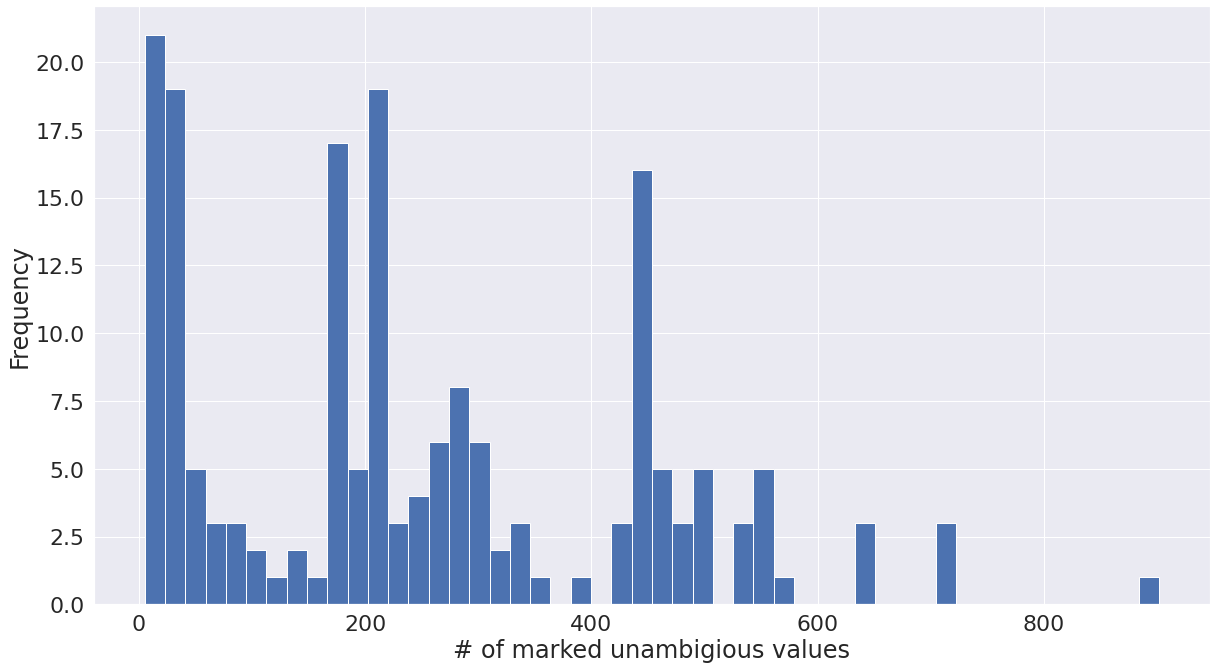

In [124]:
ax = plt.hist(df['num_marked_unambigious_vals'], bins=50)
plt.ylabel('Frequency');plt.xlabel('# of marked unambigious values')

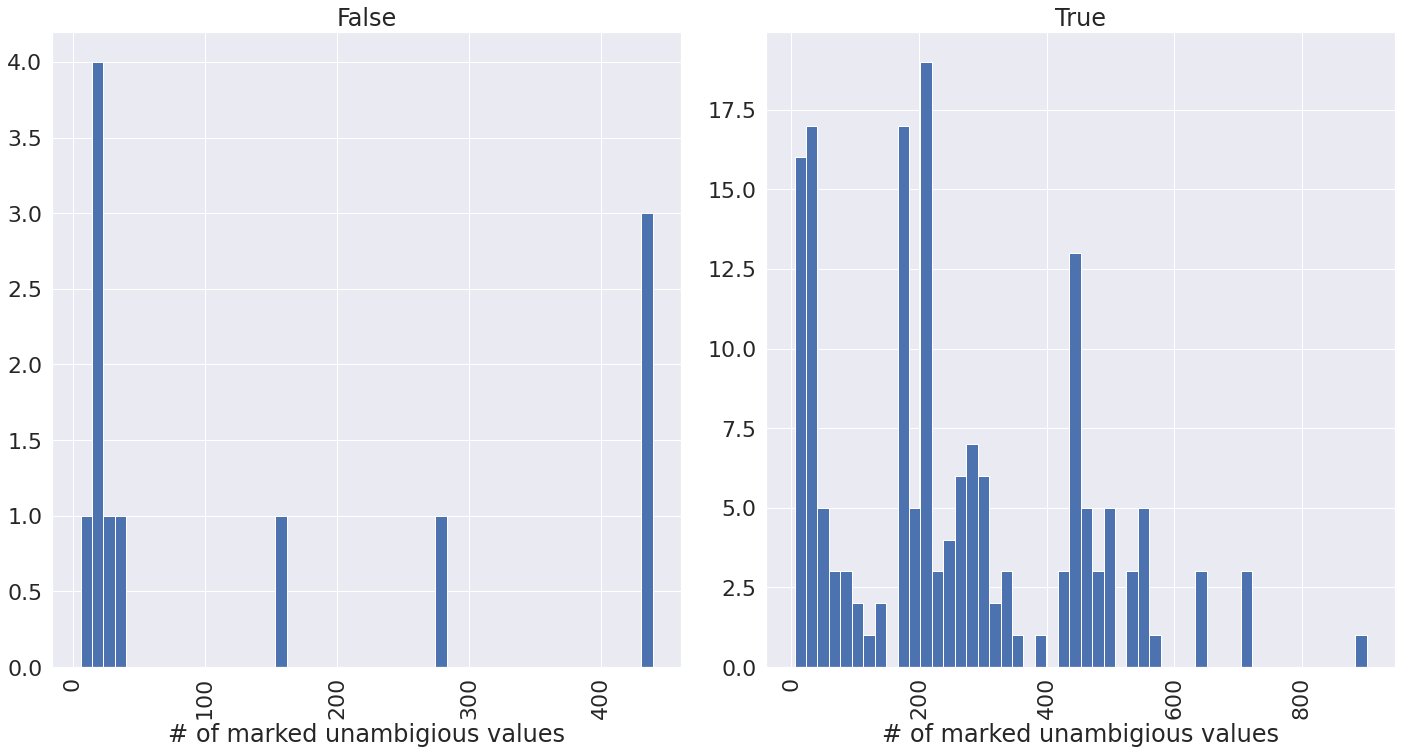

In [144]:
fig, ax = plt.subplots(1)
ax = df['num_marked_unambigious_vals'].hist(by=df['num_meanings_correctness'], ax=ax, bins=50)
ax[0].set_xlabel('# of marked unambigious values')
ax[1].set_xlabel('# of marked unambigious values')
plt.tight_layout()
plt.savefig(df_path+'num_of_meanings/meanings_evaluation.svg')

# Synthetic Example Large With Nulls

In [145]:
df_path = 'output/synthetic_example_large_with_nulls/'
g_path = '../graph_construction/combined_graphs_output/synthetic_benchmark_large_with_nulls/bipartite/bipartite.graph'

df = pd.read_pickle(df_path + 'graph_stats_df.pickle')
G = pickle.load(open(g_path, "rb"))

# Add the is_homograph column
df['is_homograph'] = np.nan
is_homograph_map = {}
for node in df[df['node_type']=='cell']['node']:
    is_homograph_map[node] = utils.groundtruth.is_cur_node_homograph(G, node)
df['is_homograph'] = df['node'].map(is_homograph_map)

df.to_pickle(df_path+'graph_stats_with_groundtruth_df.pickle')

# Filter out nodes with degree 1
df = stp.process_df(df, G)
df['num_meanings_groundtruth'] = np.nan
df

There are 6503 cell nodes with a degree greater than 1
There are 614 unique ranks based on BC.


,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth
70,missing,cell,1.611175e-01,True,1.0,NaN
2059,unknown,cell,1.244477e-01,True,2.0,NaN
2815,undefined,cell,1.045398e-02,True,3.0,NaN
723,Jamaica,cell,3.296411e-03,True,4.0,NaN
7589,Palm,cell,3.005904e-03,True,5.0,NaN
...,...,...,...,...,...,...
27226,Korean,cell,1.858687e-11,False,614.0,NaN
27233,Chinese,cell,1.858687e-11,False,614.0,NaN
27263,Asian Indian,cell,1.858687e-11,False,614.0,NaN
27267,Tongan,cell,1.858687e-11,False,614.0,NaN


In [146]:
print('There are', len(df[df['is_homograph']==True]), 'homographs based on the groundtruth')

json.dumps(df[df['is_homograph']==True]['node'].tolist())

There are 183 homographs based on the groundtruth


'["missing", "unknown", "undefined", "Jamaica", "Palm", "Cuba", "Clementine", "Magnolia", "Western", "Jicama", "Lettuce", "Guava", "Suzy", "Hugo", "Viva", "Charity", "Brooklyn", "Kiwi", "Michael", "Kohlrabi", "Darcy", "Pumpkin", "Terri", "Chicago", "House", "Noah", "Virginia", "Timothy", "ES", "Yucca", "Luther", "Constantine", "Golden", "Middleton", "Starbuck", "Lincoln", "Bar", "Anastasia", "Gus", "Wade", "Ransom", "Somerset", "Jimmy", "TL", "San Francisco", "Beaufort", "Rio", "Mariner", "Spring", "Rogue", "Aurora", "Garland", "Mirabel", "Denver", "Shane", "Cinderella", "SM", "Gantz", "Montana", "CL", "Inger", "M", "Cougar", "Nebraska", "Elmira", "GT", "LS", "MG", "Valerie", "Rosie", "Franklyn", "Pathfinder", "Focus", "Kansas", "Magnum", "Adriaens", "Manuel", "Gaylord", "Maddy", "Romain", "Jaguar", "Wichita", "Pueblo", "Seminole", "Lamont", "Tracy", "Barrie", "Harland", "XK", "Equinox", "Aura", "Georgia", "Denton", "Tacoma", "Tucson", "Ford", "Orlando", "Raleigh", "Montgomery", "Katy"

In [147]:
# Assign the groundtruth number of meanings for each homograph in the dataframe
for idx, row in df[df['is_homograph'] == True].iterrows():
    df.loc[idx, 'num_meanings_groundtruth'] = len(utils.graph_helpers.get_cell_node_column_names(G, row['node']))

df[df['is_homograph'] == True].sort_values(by='betweenness_centrality', ascending=False)

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth
70,missing,cell,1.611175e-01,True,1.0,17.0
2059,unknown,cell,1.244477e-01,True,2.0,11.0
2815,undefined,cell,1.045398e-02,True,3.0,8.0
723,Jamaica,cell,3.296411e-03,True,4.0,2.0
7589,Palm,cell,3.005904e-03,True,5.0,2.0
...,...,...,...,...,...,...
27428,Comanche,cell,1.487889e-05,True,213.0,2.0
2004,ME,cell,1.108179e-05,True,219.0,2.0
1959,California,cell,5.439775e-06,True,267.0,2.0
1945,LA,cell,5.320422e-06,True,272.0,2.0


In [148]:
with open(df_path + 'num_of_meanings/attr_to_type.json') as json_file:
    attr_to_type = json.load(json_file)

# Update the dataframe to include the number of meanings inferred by type propagation
df['num_meanings'] = np.nan
df['num_marked_unambigious_vals'] = np.nan
for val in attr_to_type:
    num_meanings = len(set([value for key, value in attr_to_type[val]['attr_to_type'].items() if value > 0]))
    num_marked_unambigious_vals = len(attr_to_type[val]['marked_unambiguous_values'])
    df.loc[df['node'] == val, 'num_meanings'] = num_meanings
    df.loc[df['node'] == val, 'num_marked_unambigious_vals'] = num_marked_unambigious_vals

df['num_meanings_correctness'] = df['num_meanings_groundtruth'] == df['num_meanings']
df[df['is_homograph'] == True].sort_values(by='betweenness_centrality', ascending=False)

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambigious_vals,num_meanings_correctness
70,missing,cell,1.611175e-01,True,1.0,17.0,9.0,595.0,False
2059,unknown,cell,1.244477e-01,True,2.0,11.0,5.0,76.0,False
2815,undefined,cell,1.045398e-02,True,3.0,8.0,6.0,312.0,False
723,Jamaica,cell,3.296411e-03,True,4.0,2.0,4.0,272.0,False
7589,Palm,cell,3.005904e-03,True,5.0,2.0,2.0,361.0,True
...,...,...,...,...,...,...,...,...,...
27428,Comanche,cell,1.487889e-05,True,213.0,2.0,2.0,464.0,True
2004,ME,cell,1.108179e-05,True,219.0,2.0,2.0,27.0,True
1959,California,cell,5.439775e-06,True,267.0,2.0,2.0,10.0,True
1945,LA,cell,5.320422e-06,True,272.0,2.0,1.0,23.0,False


In [149]:
print('Correctly inferred number of meanings for', df['num_meanings_correctness'].value_counts()[True], 'homographs. Precision is:', df['num_meanings_correctness'].value_counts()[True] / len(df[df['is_homograph'] == True]))

Correctly inferred number of meanings for 134 homographs. Precision is: 0.73224043715847


In [150]:
df[(df['is_homograph'] == True) & (df['num_meanings_correctness'] == False)]

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambigious_vals,num_meanings_correctness
70,missing,cell,1.611175e-01,True,1.0,17.0,9.0,595.0,False
2059,unknown,cell,1.244477e-01,True,2.0,11.0,5.0,76.0,False
2815,undefined,cell,1.045398e-02,True,3.0,8.0,6.0,312.0,False
723,Jamaica,cell,3.296411e-03,True,4.0,2.0,4.0,272.0,False
258,Cuba,cell,2.793962e-03,True,6.0,2.0,3.0,17.0,False
23059,Suzy,cell,1.540577e-03,True,13.0,2.0,3.0,277.0,False
24144,Darcy,cell,1.016443e-03,True,21.0,2.0,3.0,198.0,False
1174,Chicago,cell,9.210311e-04,True,24.0,2.0,3.0,268.0,False
546,Virginia,cell,8.582192e-04,True,27.0,3.0,2.0,10.0,False
300,Lincoln,cell,7.014752e-04,True,37.0,3.0,2.0,308.0,False


In [151]:
df[df['num_meanings_groundtruth'] > 2]

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambigious_vals,num_meanings_correctness
70,missing,cell,0.161117,True,1.0,17.0,9.0,595.0,False
2059,unknown,cell,0.124448,True,2.0,11.0,5.0,76.0,False
2815,undefined,cell,0.010454,True,3.0,8.0,6.0,312.0,False
546,Virginia,cell,0.000858,True,27.0,3.0,2.0,10.0,False
300,Lincoln,cell,0.000701,True,37.0,3.0,2.0,308.0,False
1401,Aurora,cell,0.000379,True,60.0,3.0,2.0,722.0,False
2012,Montana,cell,0.000299,True,79.0,3.0,2.0,87.0,False


/home/aristotle/Documents/domain_net/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/hist.py:354: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  axes = _grouped_hist(


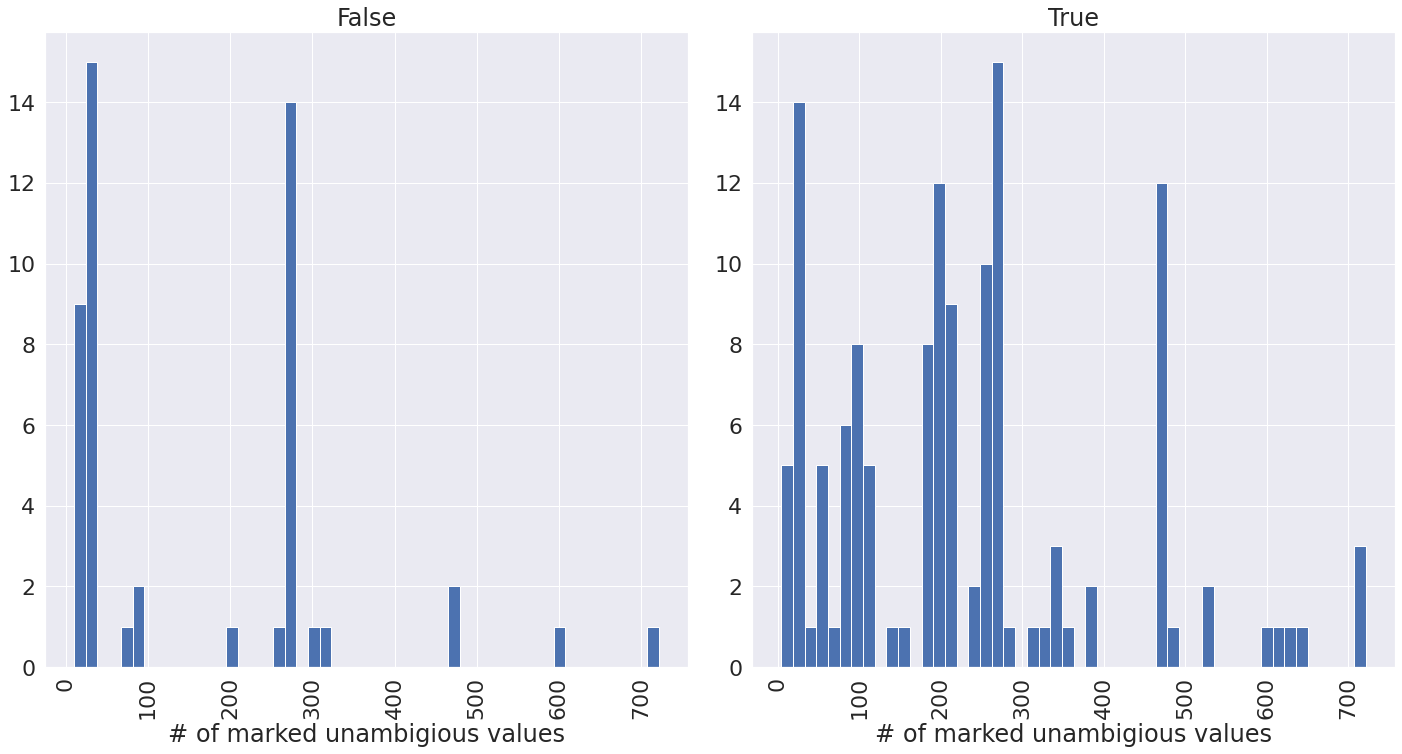

In [152]:
fig, ax = plt.subplots(1)
ax = df['num_marked_unambigious_vals'].hist(by=df['num_meanings_correctness'], ax=ax, bins=50)
ax[0].set_xlabel('# of marked unambigious values')
ax[1].set_xlabel('# of marked unambigious values')
plt.tight_layout()
plt.savefig(df_path+'num_of_meanings/meanings_evaluation.svg')

# TUS

In [21]:
df_path = 'output/TUS/'
g_path = '../graph_construction/combined_graphs_output/TUS/bipartite/bipartite.graph'

df = pd.read_pickle(df_path + 'graph_stats_with_groundtruth_df.pickle')
G = pickle.load(open(g_path, "rb"))

# Remove nodes with degree 1 from the dataframe
df = stp.process_df(df, G)

# Compute the groundtruth for the number of meanings for each homograph
df = utils.num_meanings.get_num_meanings_groundtruth(df, G)
df.sort_values(by='betweenness_centrality', ascending=False).head(30)

There are 185941 cell nodes with a degree greater than 1
There are 2994 unique ranks based on BC.


,node,node_type,betweenness_centrality,approximate_betweenness_centrality,is_homograph,has_missing_key,dense_rank,num_meanings_groundtruth
65462,Music Faculty,cell,0.051298,0.000639,True,False,1.0,3.0
28669,Manitoba Hydro,cell,0.033938,0.000448,True,False,2.0,2.0
70313,.,cell,0.023005,0.000278,True,False,3.0,3.0
10223,50,cell,0.022695,0.000293,True,False,4.0,8.0
47053,1800ZZMALDY2,cell,0.022212,0.000281,True,False,5.0,2.0
167467,Conseil de d�veloppement du loisir scientifique,cell,0.019039,0.000248,True,False,6.0,2.0
37189,125,cell,0.018832,0.000235,True,False,7.0,4.0
17681,2,cell,0.018183,0.000220,True,False,8.0,8.0
154414,Biomedical Engineering,cell,0.017811,0.000219,True,False,9.0,2.0
178282,SQA,cell,0.012905,0.000159,True,False,10.0,2.0


In [23]:
df.sort_values(by='betweenness_centrality', ascending=False).head(50)

,node,node_type,betweenness_centrality,approximate_betweenness_centrality,is_homograph,has_missing_key,dense_rank,num_meanings_groundtruth
65462,Music Faculty,cell,0.051298,0.000639,True,False,1.0,3.0
28669,Manitoba Hydro,cell,0.033938,0.000448,True,False,2.0,2.0
70313,.,cell,0.023005,0.000278,True,False,3.0,3.0
10223,50,cell,0.022695,0.000293,True,False,4.0,8.0
47053,1800ZZMALDY2,cell,0.022212,0.000281,True,False,5.0,2.0
167467,Conseil de d�veloppement du loisir scientifique,cell,0.019039,0.000248,True,False,6.0,2.0
37189,125,cell,0.018832,0.000235,True,False,7.0,4.0
17681,2,cell,0.018183,0.000220,True,False,8.0,8.0
154414,Biomedical Engineering,cell,0.017811,0.000219,True,False,9.0,2.0
178282,SQA,cell,0.012905,0.000159,True,False,10.0,2.0


In [25]:
df['num_meanings_groundtruth'].value_counts()

1.0     14885
2.0      9791
3.0      1059
4.0       231
5.0        43
6.0        12
7.0         8
8.0         5
20.0        1
Name: num_meanings_groundtruth, dtype: int64

In [28]:
utils.graph_helpers.get_cell_node_column_names(G, 'Manitoba Hydro')

['Institution-�tablissement', 'Unnamed: 11']

# Testing

In [45]:
def draw_bipartite_graph(G):
    attr_nodes = [node for node,node_data in G.nodes(data=True) if node_data['type']=='attr']
    cell_nodes = [node for node,node_data in G.nodes(data=True) if node_data['type']=='cell']

    B = nx.Graph()
    B.add_nodes_from(attr_nodes, bipartite=0)
    B.add_nodes_from(cell_nodes, bipartite=1)
    B.add_edges_from(G.edges)

In [19]:
df_path = 'output/synthetic_example_large/'
g_path = '../graph_construction/combined_graphs_output/synthetic_benchmark_large/bipartite/bipartite.graph'

df = pd.read_pickle(df_path + 'graph_stats_df.pickle')
G = pickle.load(open(g_path, "rb"))

3


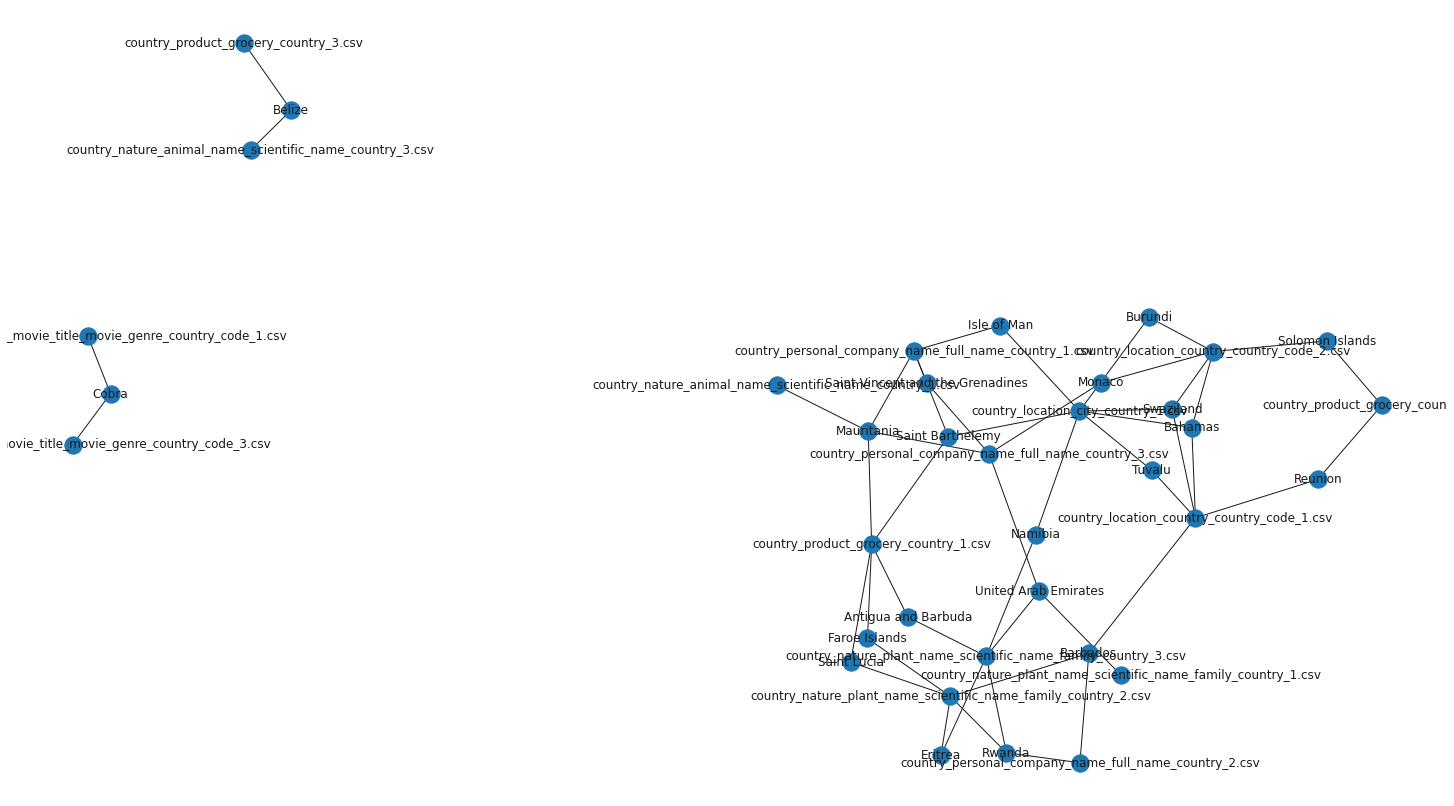

In [20]:
marked_UV = [
    "Antigua and Barbuda",
    "Bahamas",
    "Barbados",
    "Belize",
    "Burundi",
    "Cobra",
    "Eritrea",
    "Faroe Islands",
    "Isle of Man",
    "Mauritania",
    "Monaco",
    "Namibia",
    "Reunion",
    "Rwanda",
    "Saint Barthelemy",
    "Saint Lucia",
    "Saint Vincent and the Grenadines",
    "Solomon Islands",
    "Swaziland",
    "Tuvalu",
    "United Arab Emirates"
]

# attribute nodes of all the marked_UV
attrs = set()
for val in marked_UV:
    attrs |= set(utils.graph_helpers.get_attribute_of_instance(G, val))

sub_G = G.subgraph(marked_UV + list(attrs)).copy()
print(nx.algorithms.components.number_connected_components(sub_G))
nx.draw(sub_G, with_labels=True)
